In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pandas as pd

In [2]:
# Specify global paths
figures_dir = '/home/sirush/Dropbox/Research/PhD/LatexFiles/Dissertation/Figures/'
absolute_filename = 'AbosluteSingleParameterSpaceBenchmarkTransientChannel.png'
relative_filename = 'RelativeSingleParameterSpaceBenchmarkTransientChannel.png'

In [3]:
# Add the Results folders of the different components
# Forward Problem
FP_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/ForwardProblem/Log_Files/'
InvProb_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/InverseProblem/Log_Files/'
ODECO_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/ODECO/Log_Files/SingleParameterSpace/'


In [4]:
# Read in the data from the forward problem
viento_log = 'log_Re{1,20,40,60,80,100}_nxnt{24,36,48,60,72}_short.txt'
viento_data = pd.read_csv(FP_dir+viento_log, sep=' ')

# Read in the data from the Inverse Problem
inv_log = 'log_short_Re{1,20,40,60,80,100}_nxnt{24,36,48,60,72}.txt'
inv_data = pd.read_csv(InvProb_dir+inv_log, sep= ' ')

# Read in the data from the ODECO problem
ODECO_log = 'log_short_Re{1,20,40,60,80,100}_nxnt{24,36,48,60,72}_numSens{1,2,3,5,11}.txt'
ODECO_data = pd.read_csv(ODECO_dir+ODECO_log, sep = ' ')

In [5]:
# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'style' : 'normal',
#         'size'   : 22}

# plt.rc('font', **font)

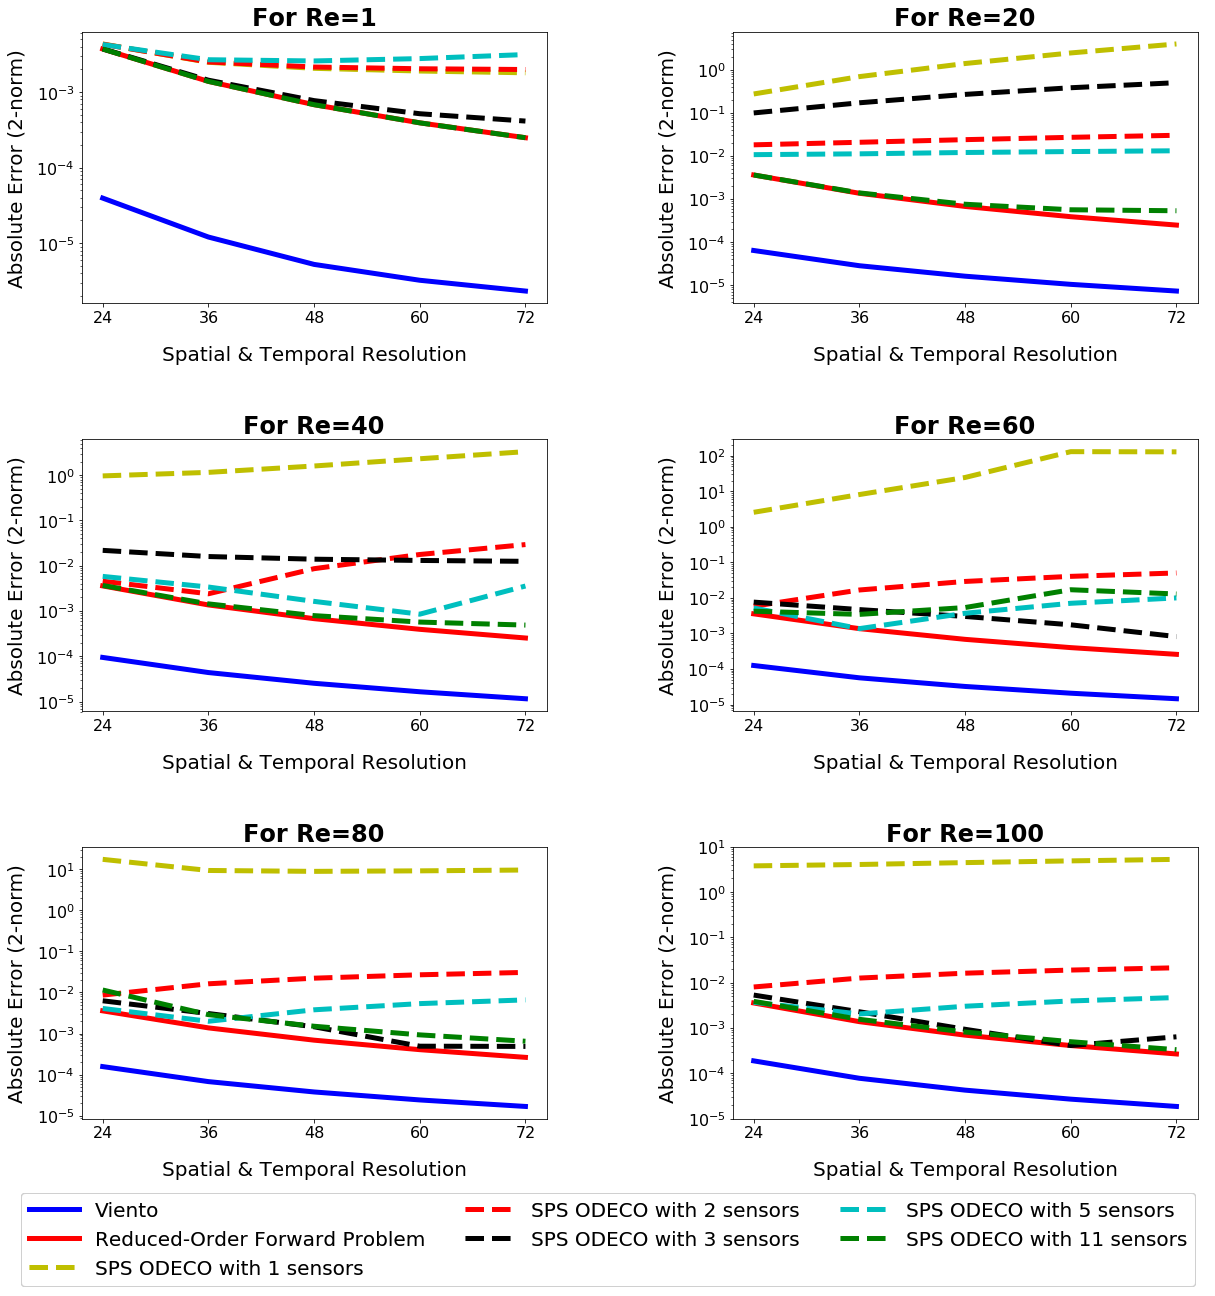

In [20]:
# This block creates a single page consisting of the plot comparisons for Viento, ROFP, and SPS ODECO
# for Re = 1,20,40,60,80, 100

# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
val = 20
plt.figure(1,figsize=(val,val)).subplots_adjust(wspace=.4,hspace=.5,) 
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
markers = {1:'y-',2:'r-',3:'k-',
          5:'c-',11:'g-'}
for Re in viento_data['Re'].unique():
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    inv = inv_data[inv_data['Re'].eq(Re)]
    ODECO = ODECO_data[ODECO_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('32{}'.format(counter)))
    # Plot the Viento data
    plt.plot(viento['nx'].unique(),
            viento['uErr'],
            label='Viento',
            color='b',
            linewidth=5.0)
    # Plot the Reduced-Order Forward Problem Data
    plt.plot(inv['nx'].unique(),
            inv['uErr2'],
            'r-',
            label='Reduced-Order Forward Problem',
            linewidth=5.0)    
    # Plot the ODECo data for the num of sensors used
    for sensors in ODECO['numSensors'].unique():
        plt.plot(ODECO['nx'].unique(),
                ODECO[ODECO['numSensors'].eq(sensors)]['uErr2'],
                markers[sensors],
                label='SPS ODECO with {} sensors'.format(sensors),
                linestyle='dashed',
                linewidth=5.0,
                markersize=10.0)  
    
#     # Define the axes
#     plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=16,labelpad=20)
#     plt.ylabel('Absolute Error (2-norm)',weight='medium',size=16,labelpad=10)
#     # Set ticks on the x-axis
#     plt.xticks(viento['nx'].unique(),size=14)
#     # Specify the location of the legend
# #     plt.legend(loc='upper right')
#     # Original figlegend
#     plt.figlegend(handlelength=3,loc='lower center',bbox_to_anchor=(.45,.01),ncol=4,fontsize=14)
#     #Trial figlegend
# #     plt.figlegend(loc='center',bbox_to_anchor=(0.9,0.5),fontsize=13)
#     # Set the y-axis to be log-scaled
#     plt.yscale('log')
#     plt.yticks(size=14)
#     plt.title('For Re={}'.format(Re),weight='bold',size=16)
    
    
    
        # Define the axes
    plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=20,labelpad=20)
    plt.ylabel('Absolute Error (2-norm)',weight='medium',size=20,labelpad=10)
    # Set ticks on the x-axis
    plt.xticks(viento['nx'].unique(),size=16)
    # Specify the location of the legend
#     plt.legend(loc='upper right')
    # Original figlegend
    plt.figlegend(handlelength=2.5,loc='lower center',ncol=3,fontsize=20)
    #Trial figlegend
#     plt.figlegend(loc='center',bbox_to_anchor=(0.9,0.5),fontsize=13)
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.yticks(size=16)
    plt.title('For Re={}'.format(Re),weight='bold',size=24)
    
plt.savefig(figures_dir+absolute_filename, 
            bbox_inches='tight', pad_inches=0.1)

plt.show() # Creates a new figure

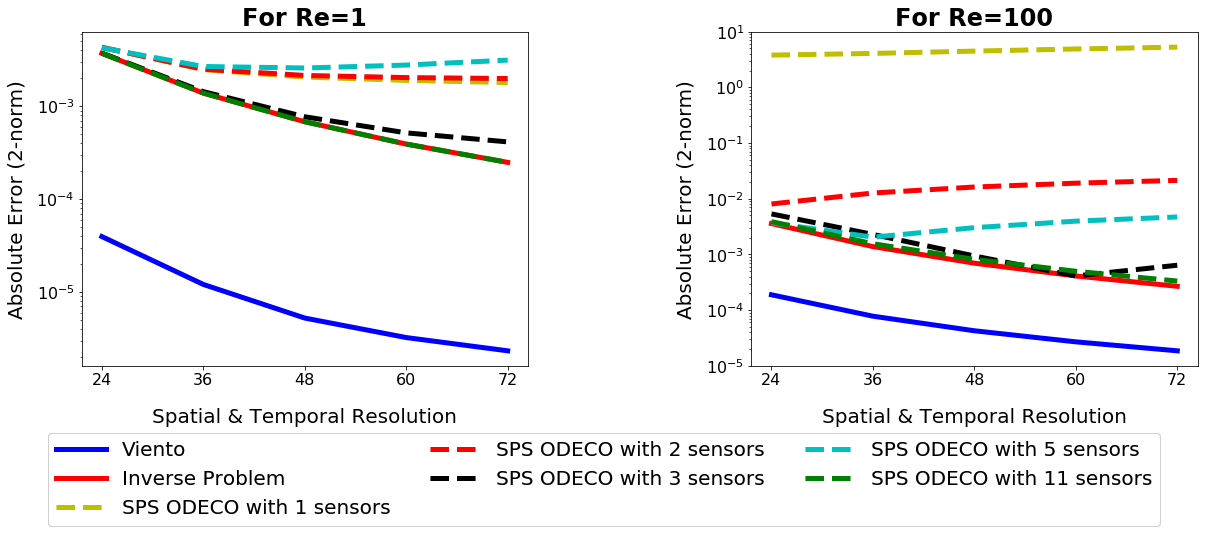

In [5]:
# This block creates a figure consisting of the plot comparisons for Viento, ROFP, and SPS ODECO
# for Re = 1 and 100

# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
val = 20
# plt.figure(1,figsize=(val,val)).subplots_adjust(wspace=.2,hspace=.4,) 
plt.figure(2,figsize=(20,8)).subplots_adjust(bottom=.3,wspace=.5)
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
markers = {1:'y-',2:'r-',3:'k-',
          5:'c-',11:'g-'}
for Re in [1,100]:
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    inv = inv_data[inv_data['Re'].eq(Re)]
    ODECO = ODECO_data[ODECO_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('12{}'.format(counter)))
    # Plot the Viento data
    plt.plot(viento['nx'].unique(),
            viento['uErr'],
            label='Viento',
            color='b',
            linewidth=5.0)
    # Plot the Reduced-Order Forward Problem Data
    plt.plot(inv['nx'].unique(),
            inv['uErr2'],
            'r-',
            label='ROFP',
            linewidth=5.0)    
    # Plot the ODECo data for the num of sensors used
    for sensors in ODECO['numSensors'].unique():
        plt.plot(ODECO['nx'].unique(),
                ODECO[ODECO['numSensors'].eq(sensors)]['uErr2'],
                markers[sensors],
                label='SPS ODECO with {} sensors'.format(sensors),
                linestyle='dashed',
                linewidth=5.0,
                markersize=10.0)  
    
    # Define the axes
    plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=20,labelpad=20)
    plt.ylabel('Absolute Error (2-norm)',weight='medium',size=20,labelpad=10)
    # Set ticks on the x-axis
    plt.xticks(viento['nx'].unique(),size=16)
    # Specify the location of the legend
#     plt.legend(loc='upper right')
    # Original figlegend
    plt.figlegend(handlelength=2.5,loc='lower center',ncol=3,fontsize=20)
    #Trial figlegend
#     plt.figlegend(loc='center',bbox_to_anchor=(0.9,0.5),fontsize=13)
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.yticks(size=16)
    plt.title('For Re={}'.format(Re),weight='bold',size=24)
    
plt.savefig(figures_dir+'AbosluteSPSBenchmarkTransientChannel_Re=1_100.png', 
            bbox_inches='tight', pad_inches=0.1)

plt.show() # Creates a new figure

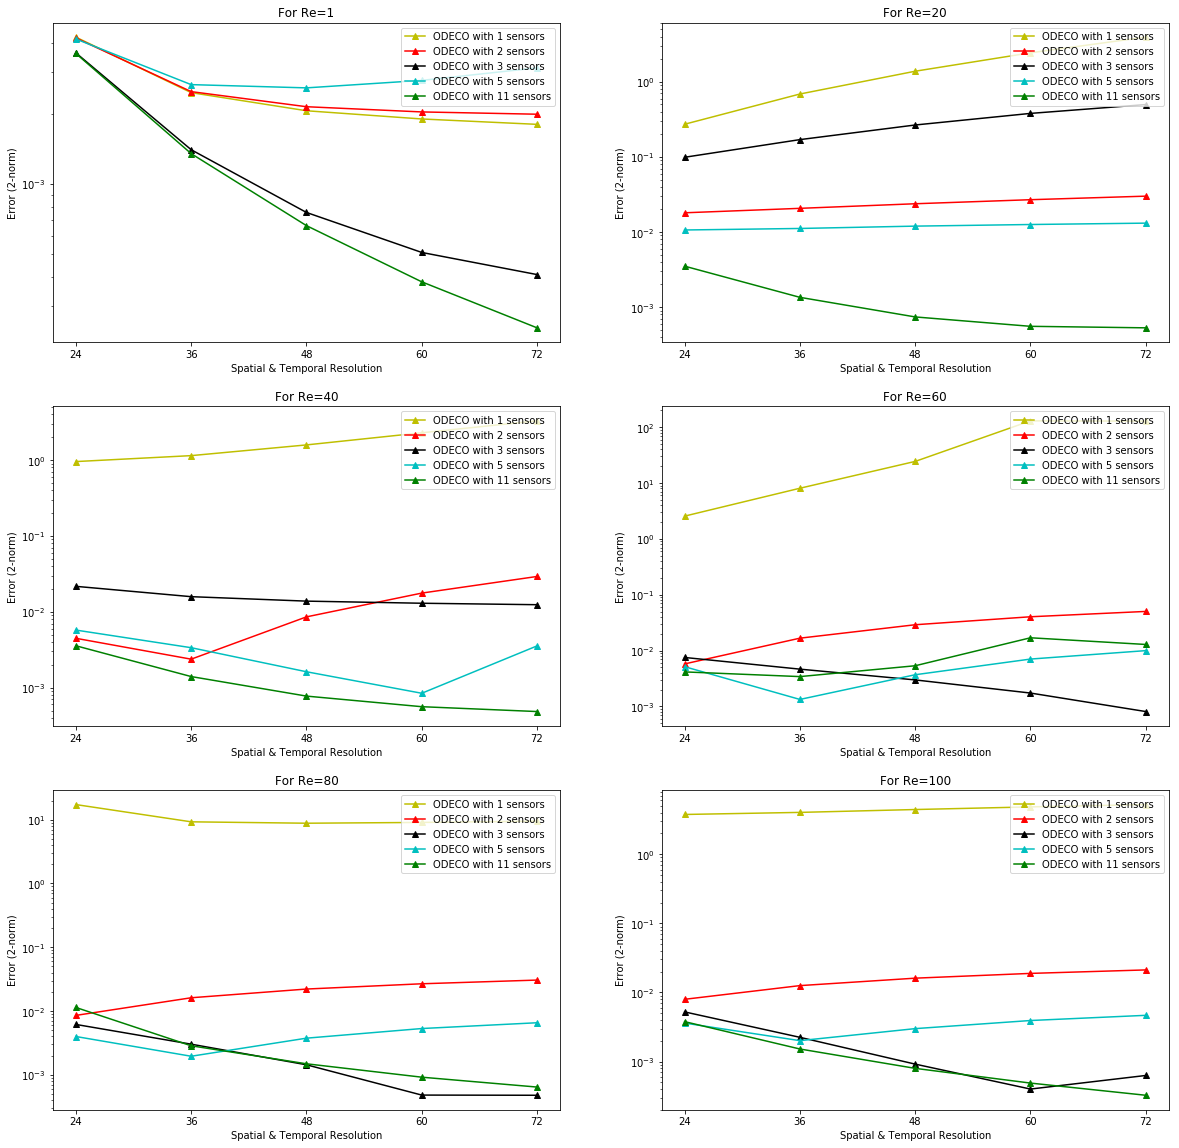

In [13]:
# Do this again for relative errors
# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
plt.figure(2,figsize=(20,20)) 
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
# markers = {1:'y^-',2:'r^-',3:'g^-',
#           5:'c^-',11:'k^-'}
for Re in viento_data['Re'].unique():
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    inv = inv_data[inv_data['Re'].eq(Re)]
    ODECO = ODECO_data[ODECO_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('32{}'.format(counter)))  
    # Plot the ODECo data for the num of sensors used
    for sensors in ODECO['numSensors'].unique():
        plt.plot(ODECO['nx'].unique(),
                ODECO[ODECO['numSensors'].eq(sensors)]['relUErr2'],
                markers[sensors],
                label='ODECO with {} sensors'.format(sensors))
    
    # Define the axes
    plt.xlabel('Spatial & Temporal Resolution')
    plt.ylabel('Error (2-norm)')
    # Set ticks on the x-axis
    plt.xticks(viento['nx'].unique())
    # Specify the location of the legend
    plt.legend(loc='upper right')
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.title('For Re={}'.format(Re))
    
plt.savefig(figures_dir+relative_filename)    
plt.show() # Creates a new figure


In [8]:
inv_data.columns.values

array(['tFinal', 'Re', 'nx', 'nSteps', 'alphaErr2', 'alphaErrInf', 'uErr2',
       'uErrInf', 'InverseTime', 'ErrorCheckRunTime', 'VTKRunTime', 'Total'], dtype=object)

In [9]:
ODECO_data.columns.values

array(['tFinal', 'Re', 'numSensors', 'nx', 'nSteps', 'tol',
       'ParameterSpace', 'alphaErr2', 'relAlphaErr2', 'uErr2', 'relUErr2',
       'KKTRunTime', 'ErrorCheckRunTime', 'VTKRunTime', 'TotalTime'], dtype=object)